# 🟥🟦 Importación de bibliotecas

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# 🟥🟦 Carga del dataset Titanic

In [2]:
# Cargamos el token de kaggle
# Hay que descargarlo primero de la página web al PC

"""
# Subirlo manualmente cada vez:

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
"""

import os

# Verificamos si el token ya está presente en el entorno
if not os.path.exists("/root/.kaggle/kaggle.json"):
    from google.colab import files
    print("Sube tu archivo kaggle.json")
    files.upload()
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("Archivo kaggle.json cargado correctamente")
else:
    print("kaggle.json ya está cargado")



Sube tu archivo kaggle.json


Saving kaggle.json to kaggle.json
Archivo kaggle.json cargado correctamente


In [3]:
# Cargamos el dataset
"""
!kaggle competitions download -c titanic
!unzip titanic.zip
"""

import os
import shutil

# Verificar si el archivo kaggle.json ya está en su lugar
kaggle_dir = os.path.expanduser("~/.kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

if not os.path.exists(os.path.join(kaggle_dir, 'kaggle.json')):
    shutil.copy('kaggle.json', kaggle_dir)
    os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)  # Cambiar permisos de seguridad
    print("Archivo kaggle.json copiado y permisos configurados.")
else:
    print("El archivo kaggle.json ya existe en el directorio ~/.kaggle.")

# Verificar si el archivo ZIP ya está descargado
zip_file = 'titanic.zip'
if not os.path.exists(zip_file):
    !kaggle competitions download -c titanic
    print("Archivo ZIP descargado.")
else:
    print("El archivo ZIP ya está descargado.")

# Descomprimir el archivo ZIP sin pedir confirmación (con opción -o para sobrescribir)
if not os.path.exists('titanic'):
    !unzip -o titanic.zip
    print("Archivo ZIP descomprimido.")
else:
    print("Los archivos ya han sido descomprimidos.")

El archivo kaggle.json ya existe en el directorio ~/.kaggle.
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 98.2MB/s]
Archivo ZIP descargado.
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
Archivo ZIP descomprimido.


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train['dataset'] = 'train'
test['dataset'] = 'test'
test['Survived'] = -1  # Creamos una columna con valores falsos para poder borrarlos más adelante

# Unión de ambos datasets
dfu = pd.concat([train, test], ignore_index=True)

🔴 Nota: He unido los datasets "train" y "test" para poder explorar y transformar los datos de ambos conjuntos de manera homogénea.

# 🟥🟦 Descripción del Dataset

#🟦 **Overview**

The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

## 🟦 **Data Dictionary**

============================================================================================

**Variable** ---------> **Definition** ----------------------------------------------------------> **Key**

============================================================================================

PassengerId

survival ----------> Survival ------------------------------------------------------------> 0 = No, 1 = Yes

pclass ------------> Ticket class -----------------------------------------------------> 1 = 1st, 2 = 2nd, 3 = 3rd

Name

sex -----------------> Sex

Age ----------------> Age in years

sibsp -------------> # of siblings / spouses aboard the Titanic

parch -------------> # of parents / children aboard the Titanic

ticket -------------> Ticket number

fare ----------------> Passenger fare

cabin -------------> Cabin number

embarked ------> Port of Embarkation --------------------------------------> C = Cherbourg, Q = Queenstown, S =
Southampton

============================================================================================

## 🟦 **Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 133.1+ KB


In [6]:
dfu.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


## Exploración de datos

1.   Para datos numéricos
*   Histogramas realizados para comprender las distribuciones
*   Corrplot
*   Tabla dinámica que compara la tasa de supervivencia entre variables numéricas

2.   Para datos categóricos
*   Realización de gráficos de barras para comprender el equilibrio de clases
*   Realización de tablas dinámicas para comprender la relación con la supervivencia

# 🟥🟦 Variables numéricas

Aquí pongo todas las variables que están en formato "int64" o "float64", aunque algunas de estas variables sean realmente categóricas, como "Survived" (que tiene -1 para saber qué datos son los de test) y "Pclass".

PassengerId, aunque es numérica, es un identificador sin significado analítico.

In [7]:
df = dfu.copy()
numericos = df.select_dtypes(include=['number']).columns
print("Variables numércias:", numericos)

Variables numércias: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


# 🟦 Histogramas realizados para comprender las distribuciones

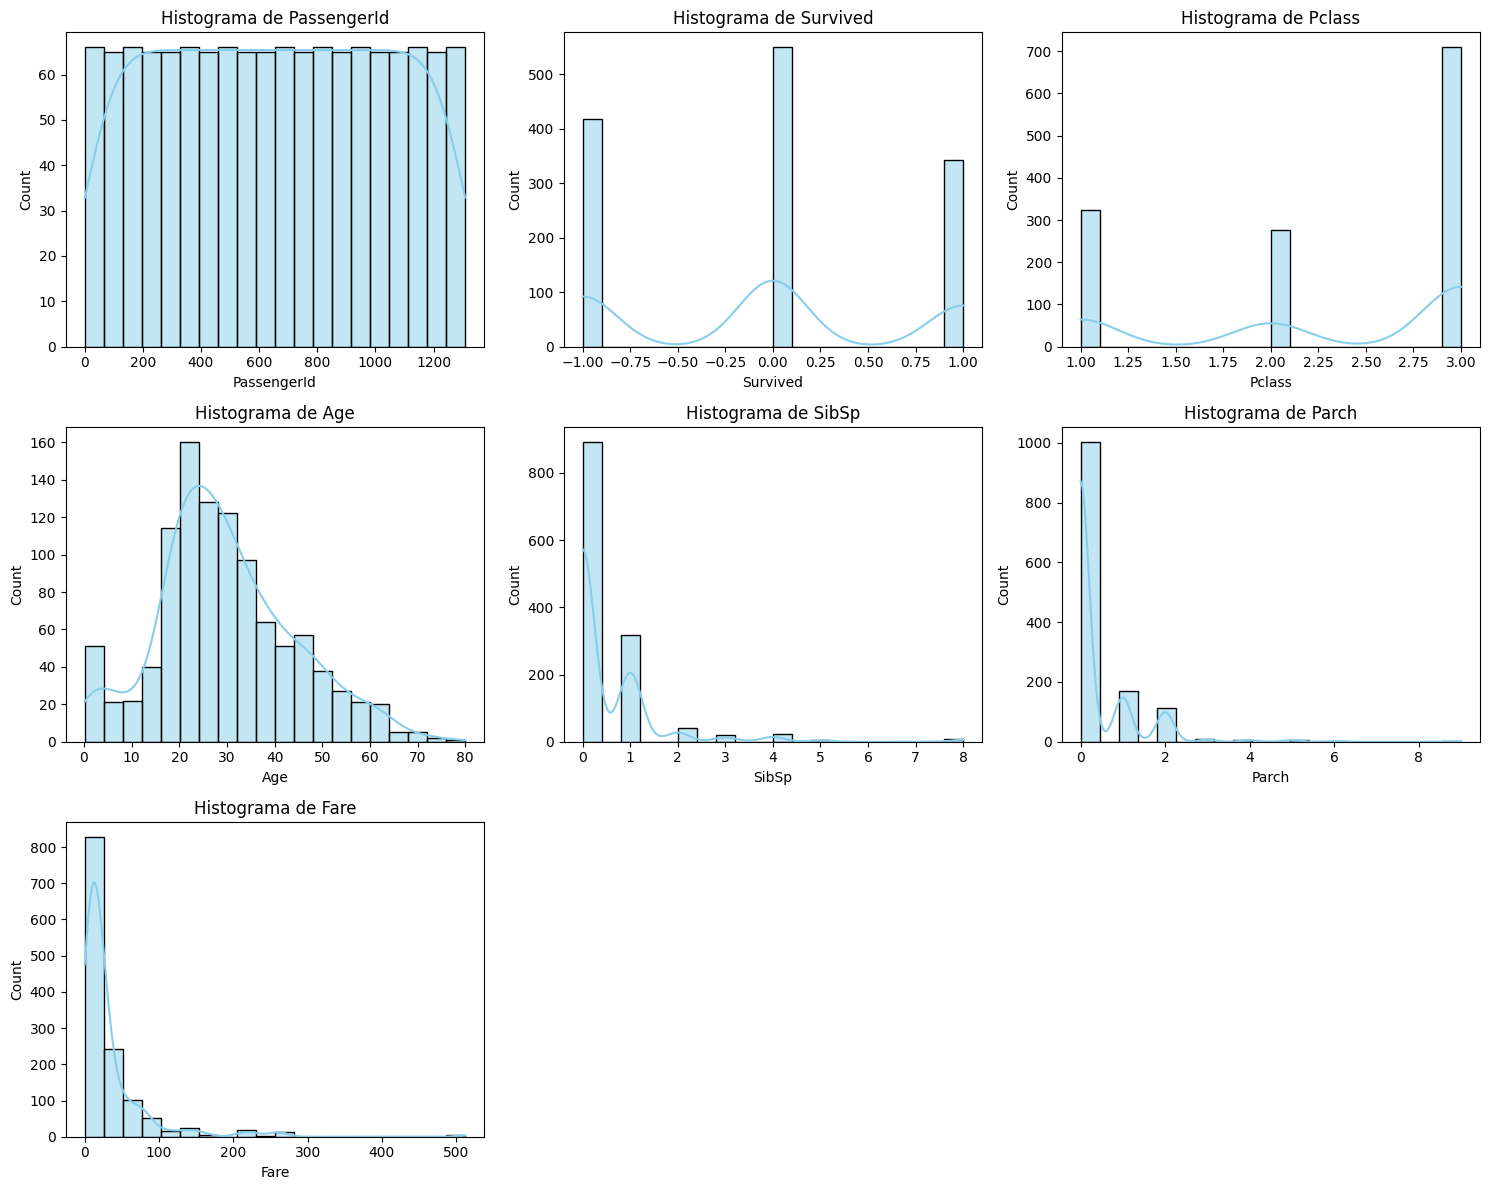

In [8]:
# Histogramas

n_cols = 3
n_vars = len(numericos)
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

for i, var in enumerate(numericos):
    row, col = divmod(i, n_cols)
    sns.histplot(df[var], bins=20, kde=True, ax=axes[row, col], color="skyblue")
    axes[row, col].set_title(f"Histograma de {var}")

# Oculta los subplots vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    row, col = divmod(j, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()

In [9]:
# Nos aseguramos de que ninguna variable cumpla normalidad

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for col in numericos:
    # Prueba de Shapiro-Wilk
  shapiro_stat, shapiro_p = stats.shapiro(df[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

  print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
  normalidad[col] = {
    "Shapiro-Wilk p-valor": round(shapiro_p, 4),

    "Normalidad (p > 0.05)": shapiro_p > 0.05
  }

PassengerId: p=0.0000 => No normal
Survived: p=0.0000 => No normal
Pclass: p=0.0000 => No normal
Age: p=0.0000 => No normal
SibSp: p=0.0000 => No normal
Parch: p=0.0000 => No normal
Fare: p=0.0000 => No normal


# 🟦 Corrplot

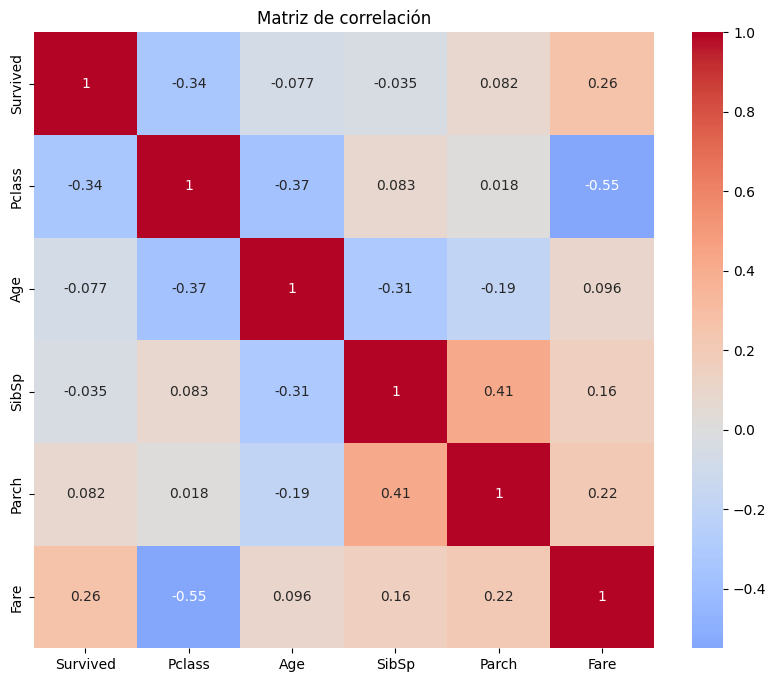

In [10]:
# Matriz de correlación

# Limpiamos los datos innecesarios para éste plot
excluir = ['PassengerId']
incluir = [col for col in numericos if col not in excluir]

# Copiamos un nuevo df sin survived (-1) y sin PassengerId
corr_df = df[df['Survived'] != -1][incluir] # Correlation Data Frame

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()

🔴 Podemos interpretar que el ratio de supervivencia está moderadamente relacionado con la tarifa (Fare) pagada de los pasajeros y con Pclass (ésta última en sentido inverso, es decir, a máyor la clase, por ejemplo, tercera clase, menos sobrevivieron, por lo que los de clase 1 sobrevivieron más que los de tercera, y esto es congruente con los resultados de Fare o tarifa, que a mayor, más sobrevivieron).

# 🟦 Tabla dinámica que compara la tasa de supervivencia entre variables
numéricas


📊 Tasa de supervivencia según rangos de 'Pclass':


,Pclass_bin,Survived
0,"(0.999, 2.0]",0.557500
1,"(2.0, 3.0]",0.242363


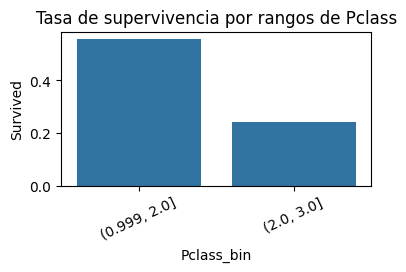


📊 Tasa de supervivencia según rangos de 'Age':


,Age_bin,Survived
0,"(0.419, 19.0]",0.481707
1,"(19.0, 25.0]",0.328467
2,"(25.0, 31.8]",0.393701
3,"(31.8, 41.0]",0.437500
4,"(41.0, 80.0]",0.373239


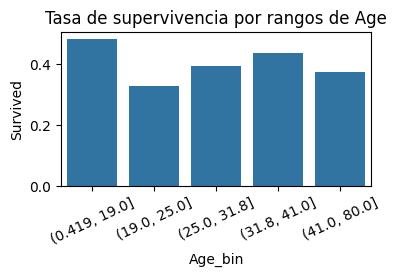


📊 Tasa de supervivencia según rangos de 'SibSp':


,SibSp_bin,Survived
0,"(-0.001, 1.0]",0.394125
1,"(1.0, 8.0]",0.270270


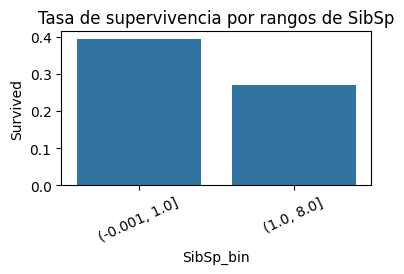


📊 Tasa de supervivencia según rangos de 'Parch':


,Parch_bin,Survived
0,"(-0.001, 1.0]",0.374372
1,"(1.0, 6.0]",0.463158


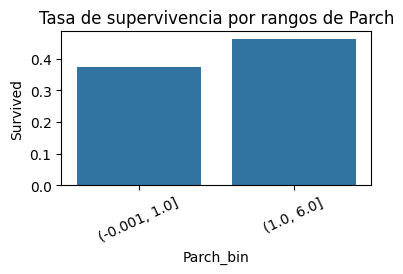


📊 Tasa de supervivencia según rangos de 'Fare':


,Fare_bin,Survived
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


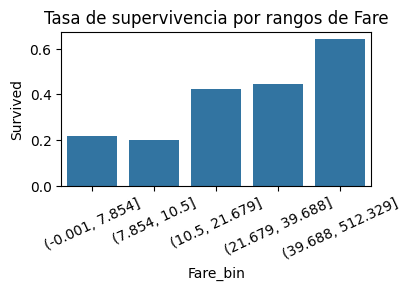

In [11]:
excluir = ['PassengerId', 'Survived'] # Añadimos Survived a exluir porque es irrelevante
incluir = [col for col in numericos if col not in excluir]

for col in incluir:
  ta_df = corr_df[[col, 'Survived']].dropna()

  # Agrupamos en 5 tramos o "bins"
  ta_df[f'{col}_bin'] = pd.qcut(ta_df[col], q=5, duplicates='drop') # "Quintiles"

  # Tasa media de supervivencia por tramo
  tabla = ta_df.groupby(f'{col}_bin', observed=False)['Survived'].mean().reset_index()

  print(f"\n📊 Tasa de supervivencia según rangos de '{col}':")
  display(tabla)

  plt.figure(figsize=(4, 2))
  sns.barplot(x=f'{col}_bin', y='Survived', data=tabla)
  plt.title(f'Tasa de supervivencia por rangos de {col}')
  plt.xticks(rotation=25)
  plt.show()

🔴 Aquí se confirma que a menor clase (clase 1 y 2), mayor tasa de supervivencia, y a mayor tarifa, mayor tasa de supervivencia.

In [12]:
# Antes de pasar a las categóricas, tengo que transformar algunas de las variables "numéricas", ya que realmente son categóricas

numToCat = ['Survived', 'Pclass']

for col in numToCat:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  dataset      1309 non-null   object  
dtypes: category(2), float64(2), int64(3), object(6)
memory usage: 115.4+ KB


# 🟥🟦 Variables categóricas

In [13]:
categoricos = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() >= 2]
print("Variables categóricas:", categoricos)

Variables categóricas: ['Survived', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'dataset']


# 🟦 Realización de gráficos de barras para comprender el equilibrio de clases

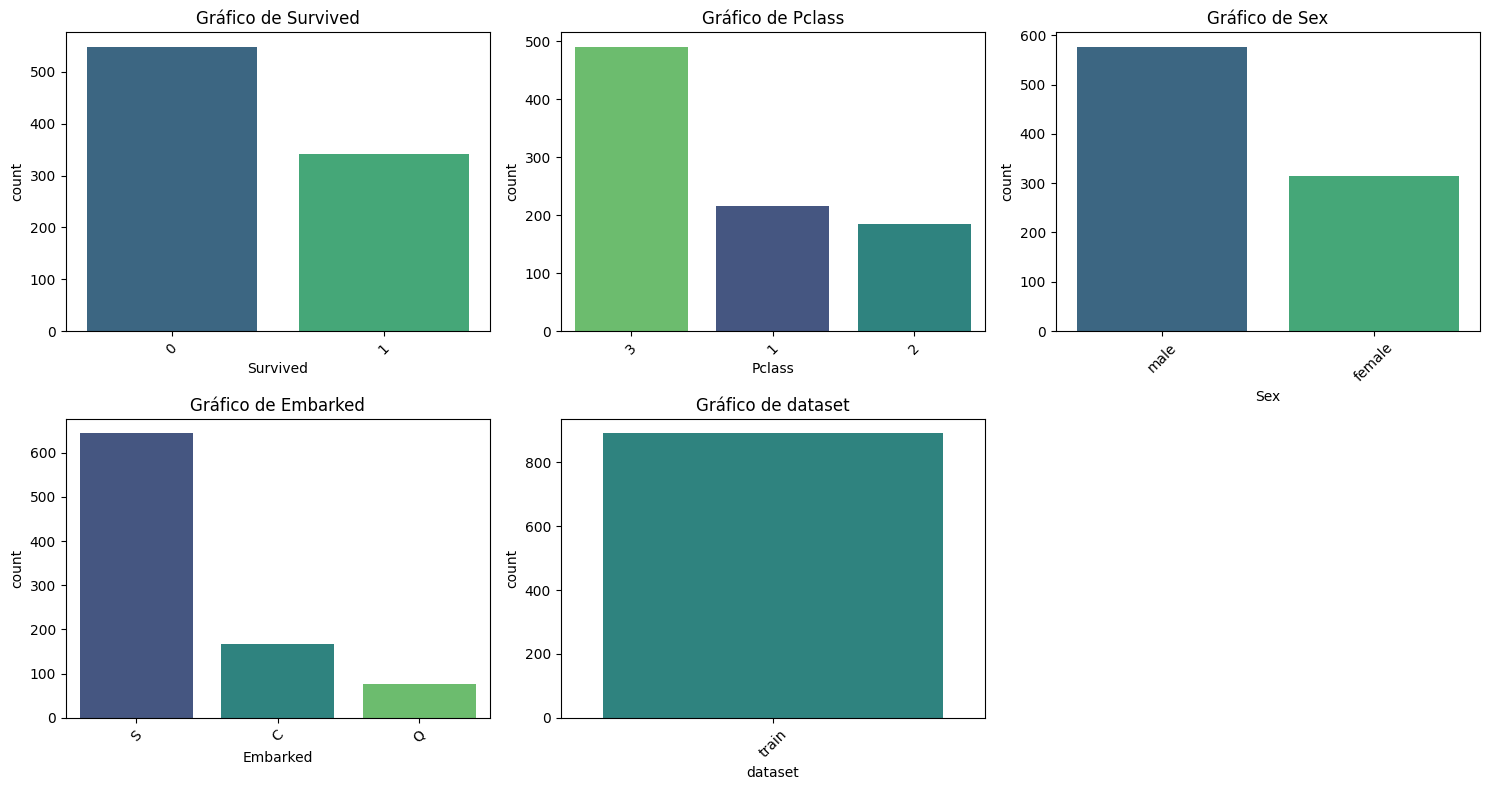

In [14]:
# Graficos de barras

# Eliminamos las variables con "demasiadas categorías" (name, ticket y cabin) y el -1 de survived,
# lo que elimina todos los registros de "test".
df_s = df[df['Survived'].isin([0, 1])].copy()
df_s['Survived'] = df_s['Survived'].cat.remove_unused_categories()
categoricos_grafico = [col for col in df_s.select_dtypes(include=['object', 'category']).columns if df_s[col].nunique() <= 10]

n_cols = 3
n_vars = len(categoricos_grafico)
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))

for i, var in enumerate(categoricos_grafico):
    row, col = divmod(i, n_cols)
    sns.countplot(x=var, data=df_s, hue=var, order=df_s[var].value_counts().index, palette='viridis', ax=axes[row, col], legend=False)
    axes[row, col].set_title(f"Gráfico de {var}")
    axes[row, col].tick_params(axis='x', rotation=45)

# Oculta los subplots vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    row, col = divmod(j, n_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout()

# 🟦 Realización de tablas dinámicas para comprender la relación con la supervivencia

In [15]:
# Realización de tablas dinámicas para comprender la relación con la supervivencia

for col in categoricos_grafico:
    tabla = pd.crosstab(df_s[col], df_s['Survived'], normalize='index') * 100
    if set(tabla.columns) == {0, 1}:
      tabla.columns = ['% No Sobrevive', '% Sobrevive']
    tabla = tabla.round(1)
    print(f"\n💡 Relación entre '{col}' y Supervivencia:")
    display(tabla)


💡 Relación entre 'Survived' y Supervivencia:


,% No Sobrevive,% Sobrevive
Survived,,
0,100.0,0.0
1,0.0,100.0



💡 Relación entre 'Pclass' y Supervivencia:


,% No Sobrevive,% Sobrevive
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2



💡 Relación entre 'Sex' y Supervivencia:


,% No Sobrevive,% Sobrevive
Sex,,
female,25.8,74.2
male,81.1,18.9



💡 Relación entre 'Embarked' y Supervivencia:


,% No Sobrevive,% Sobrevive
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.3,33.7



💡 Relación entre 'dataset' y Supervivencia:


,% No Sobrevive,% Sobrevive
dataset,,
train,61.6,38.4


🔴 Podemos ver como hay una clara tendencia del sexo femenino a sobrevivir, a la vez que (ya lo hemos visto anteriormente) una relación entr la primera clase y las posibilidades de supervivencia.

# 🟥🟦 Ingeniería de características

1.   Camarote - Simplificar los camarotes (se evaluó si el tipo de camarote (cabin_adv) o la compra de billetes en varios camarotes (cabin_multiple) influían en la supervivencia)
2.   Billetes - ¿Influyen los distintos tipos de billetes en las tasas de supervivencia?
3.   ¿Relaciona el título de una persona con las tasas de supervivencia?

In [16]:
# CAMAROTES
# Usaré df_s ya que necesito calcular la influencia de los camarotes en la supervivencia

df_s['cabin_adv'] = df_s['Cabin'].str[0]  # Extraer la letra del camarote
df_s['cabin_adv'] = df_s['cabin_adv'].fillna('Unknown')  # Rellenar nulos

df_s['cabin_multiple'] = df_s['Cabin'].apply(lambda x: 1 if isinstance(x, str) and len(x.split()) > 1 else 0)

# Tabla cruzada cabin_adv vs Survived
print(pd.crosstab(df_s['cabin_adv'], df_s['Survived'], normalize='index'), "\n\n")

# Tabla cruzada cabin_multiple vs Survived
print(pd.crosstab(df_s['cabin_multiple'], df_s['Survived'], normalize='index'))


Survived          0         1
cabin_adv                    
A          0.533333  0.466667
B          0.255319  0.744681
C          0.406780  0.593220
D          0.242424  0.757576
E          0.250000  0.750000
F          0.384615  0.615385
G          0.500000  0.500000
T          1.000000  0.000000
Unknown    0.700146  0.299854 


Survived               0         1
cabin_multiple                    
0               0.621684  0.378316
1               0.416667  0.583333


🔴 Es muy revelador observar cómo hay algunos códigos de camarotes (designan distintas zonas del barco) donde el ratio de supervivencia o deceso está igualado, mientras que en otros la supervivencia claramente está favorecida. Tamibién reseñables los camarotes con la letra "T", en los que no parece haber sobrevivido nadie.

🔴 En la segunda tebla, también es interesante ver cómo los pasajeros que pagaron múltiples camarotes tuvieron un 58% de posibilidades de sobrevivir, mientras que el resto de la muestra, sólo un 38%.

In [17]:
# BILLETES
# Parece que todos los tickets tienen un prefijo antes de la parte numérica del código diferencial
# Voy a extraer dichos prefijos, y sumar

# Transformo Survived a int para poder operar
df_s['Survived'] = df_s['Survived'].astype(int)

# Extraer prefijo del ticket (si se encuentra separado por un espacio del código)
df_s['ticket_prefix'] = df_s['Ticket'].apply(lambda x: x.split()[0] if isinstance(x, str) and ' ' in x else 'NoPrefix')

# Tasa de supervivencia por prefijo
prefix_survival = df_s.groupby('ticket_prefix').agg(
    survival_rate=('Survived', 'mean'),
     ticket_count=('Ticket', 'count')
     ).sort_values(by='ticket_count', ascending=False)

print(prefix_survival.head(12))

               survival_rate  ticket_count
ticket_prefix                             
NoPrefix            0.383459           665
PC                  0.650000            60
C.A.                0.481481            27
STON/O              0.416667            12
A/5                 0.100000            10
W./C.               0.111111             9
CA.                 0.125000             8
SOTON/O.Q.          0.125000             8
SOTON/OQ            0.142857             7
A/5.                0.142857             7
CA                  0.000000             6
STON/O2.            0.500000             6


In [18]:
num_prefijos = df_s['ticket_prefix'].nunique()
print(f"Número de prefijos distintos: {num_prefijos}")

Número de prefijos distintos: 43


🔴 Habiendo 43 prefijos distintos (incluyendo los que no tienen prefijo en un grupo), es interesante ver como 38 de ellos perteneciían a grupos de menos de 10 personas.

🔴 Parece que hay una serie de tickets con unos prefijos que tienen un ratio del 100% de supervivencia, pero es porque sólo lo tenía una persona, y ésta sobrevivió.

In [19]:
# Algunos pasajeros compartieron ticket, hago un cálculo para ver si hay alguna relación

# Número de pasajeros por ticket
ticket_counts = df_s.groupby('Ticket').size().rename('num_passengers')

# Número de supervivientes por ticket
ticket_survived = df_s.groupby('Ticket')['Survived'].sum().rename('num_survived')

# Nuevo DataFrame
ticket_summary = pd.concat([ticket_counts, ticket_survived], axis=1)

# Proporción de supervivencia por ticket
ticket_summary['survival_rate'] = ticket_summary['num_survived'] / ticket_summary['num_passengers']

# Representamos los casos de los tickets compartidos por el mayor número de personas
print(ticket_summary.sort_values(by='num_passengers', ascending=False).head(12))

              num_passengers  num_survived  survival_rate
Ticket                                                   
1601                       7             5       0.714286
CA. 2343                   7             0       0.000000
347082                     7             0       0.000000
CA 2144                    6             0       0.000000
3101295                    6             0       0.000000
347088                     6             0       0.000000
382652                     5             0       0.000000
S.O.C. 14879               5             0       0.000000
349909                     4             0       0.000000
2666                       4             4       1.000000
19950                      4             2       0.500000
W./C. 6608                 4             0       0.000000


🔴 Parece haber una influencia, negativa, en el número de personas por ticket, ya que hay muy pocos supervivientes dentro de los casos con los billetes más compartidos

In [20]:
# TÍTULO

# Extraemos título de Name
df_s['Title'] = df_s['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()

# Agrupamos por título y calculamos la tasa de supervivencia
title_stats = df_s.groupby('Title').agg(
    survival_rate=('Survived', 'mean'),
    count=('Survived', 'count')
).sort_values(by='count', ascending=False)

print(title_stats)

              survival_rate  count
Title                             
Mr                 0.156673    517
Miss               0.697802    182
Mrs                0.792000    125
Master             0.575000     40
Dr                 0.428571      7
Rev                0.000000      6
Mlle               1.000000      2
Major              0.500000      2
Col                0.500000      2
Capt               0.000000      1
Lady               1.000000      1
Don                0.000000      1
Jonkheer           0.000000      1
Mme                1.000000      1
Ms                 1.000000      1
Sir                1.000000      1
the Countess       1.000000      1


🔴 Podemos ver que el ratio de supervivencia más alto es para los títulos correspondientes a mujeres (Miss y Mrs), siguiendole Master (niños) con aproximadamente un 20% menos ratio de supervivencia que las mujeres. Los hombres (Mr), solo tienen un 15% de ratio de supervivencia.

# 🟥🟦 Preprocesamiento de datos para el modelo

1.   Eliminar los valores nulos de Embarcado (sólo 2)
2.   Incluir sólo las variables relevantes (Como tenemos datos limitados, se debe excluir caracteristicas
3.    Hacer transformaciones categóricas en todos los datos (utilice el codificador onehot).
4.   Impute los datos con la media de la tarifa y la edad (también debería experimentar con la mediana)
5.   Normalice la tarifa utilizando el logaritmo para darle más apariencia de distribución normal
6.   Escale los datos 0-1 con un escalador estándar

In [21]:
# Un pequeño resumen de cómo es actualmente el dataframe
# Podemos ver que aquí, "Survived" es "category", no "int64"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     1309 non-null   category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
 12  dataset      1309 non-null   object  
dtypes: category(2), float64(2), int64(3), object(6)
memory usage: 115.4+ KB


In [22]:
# Conservo los datos de Survived faltantes de test, por lo que la columna "dataset" es redundante
print(df['Survived'].to_string)

<bound method Series.to_string of 0       0
1       1
2       1
3       1
4       0
       ..
1304   -1
1305   -1
1306   -1
1307   -1
1308   -1
Name: Survived, Length: 1309, dtype: category
Categories (3, int64): [-1, 0, 1]>


In [23]:
# Eliminar los valores nulos de Embarcado (sólo 2)

print("Nulos en 'Embarked' antes:", df['Embarked'].isnull().sum())
df = df.dropna(subset=['Embarked'])
print("Nulos en 'Embarked' después:", df['Embarked'].isnull().sum())

Nulos en 'Embarked' antes: 2
Nulos en 'Embarked' después: 0


In [24]:
# Incluir sólo las variables relevantes (Como tenemos datos limitados, se debe excluir caracteristicas)
# Voy a eliminar las columnas que no sean necesarias para el funcionamiento de los modelos que haré a continuación
"""
Voy a excluir a:
- PassengerId => No necesario
- Name ========> No aporta mucho más que PassengerId, solo el título y ya lo hemos analizado anteriormente
- Ticket ======> Demasiado complejo para el estudio
- Cabin =======> Demasiados valores nulos
- dataset =====> Redundante, puedo saber qué variables son de test por el -1 en "Survived"
"""

excluir = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'dataset']

df_r = df.drop(columns=excluir).copy() # Data Frame Relevant

df_r.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1307 non-null   category
 1   Pclass    1307 non-null   category
 2   Sex       1307 non-null   object  
 3   Age       1044 non-null   float64 
 4   SibSp     1307 non-null   int64   
 5   Parch     1307 non-null   int64   
 6   Fare      1306 non-null   float64 
 7   Embarked  1307 non-null   object  
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 74.3+ KB


In [25]:
# One-Hot Encoding

df_e = pd.get_dummies(df_r, columns=['Pclass', 'Sex', 'Embarked'], drop_first=False)

In [26]:

df_e['Age'] = df_e['Age'].fillna(df_e['Age'].mean())
df_e['Fare'] = df_e['Fare'].fillna(df_e['Fare'].mode()[0]) # Por la forma de la distribución, es mejor rellenar con la moda

df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1307 non-null   category
 1   Age         1307 non-null   float64 
 2   SibSp       1307 non-null   int64   
 3   Parch       1307 non-null   int64   
 4   Fare        1307 non-null   float64 
 5   Pclass_1    1307 non-null   bool    
 6   Pclass_2    1307 non-null   bool    
 7   Pclass_3    1307 non-null   bool    
 8   Sex_female  1307 non-null   bool    
 9   Sex_male    1307 non-null   bool    
 10  Embarked_C  1307 non-null   bool    
 11  Embarked_Q  1307 non-null   bool    
 12  Embarked_S  1307 non-null   bool    
dtypes: bool(8), category(1), float64(2), int64(2)
memory usage: 62.7 KB


In [27]:
# Normalice la tarifa utilizando el logaritmo para darle más apariencia de distribución normal
df_e['Fare'] = np.log1p(df_e['Fare']) # Fare normalizado con logaritmo para darle más apariencia de distribución normal

In [28]:
# Viendo los outliers que hay, sobretodo en 'SibSp', 'Parch' y 'Fare', creo que el mejor escalado sería RobustScaler, pero
# como se me pide escalar entre 0 y 1, useré MinMaxScaler.
# https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols_to_scale = ['Age', 'SibSp', 'Parch', 'Fare']

df_m = df_e.copy() # Data Frame for Models

df_m[cols_to_scale] = scaler.fit_transform(df_m[cols_to_scale]) # Escalamos entre 0 y 1

df_m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    1307 non-null   category
 1   Age         1307 non-null   float64 
 2   SibSp       1307 non-null   float64 
 3   Parch       1307 non-null   float64 
 4   Fare        1307 non-null   float64 
 5   Pclass_1    1307 non-null   bool    
 6   Pclass_2    1307 non-null   bool    
 7   Pclass_3    1307 non-null   bool    
 8   Sex_female  1307 non-null   bool    
 9   Sex_male    1307 non-null   bool    
 10  Embarked_C  1307 non-null   bool    
 11  Embarked_Q  1307 non-null   bool    
 12  Embarked_S  1307 non-null   bool    
dtypes: bool(8), category(1), float64(4)
memory usage: 62.7 KB


In [29]:
df_m.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0.273456,0.125,0.0,0.338125,False,False,True,False,True,False,False,True
1,1,0.473882,0.125,0.0,0.685892,True,False,False,True,False,True,False,False
2,1,0.323563,0.000,0.0,0.350727,False,False,True,True,False,False,False,True
3,1,0.436302,0.125,0.0,0.639463,True,False,False,True,False,False,False,True
4,0,0.436302,0.000,0.0,0.352955,False,False,True,False,True,False,False,True


In [30]:
# Una vez tenemos el df_m limpio, es hora de volver a separarlo en el de train y el de test

train = df_m[df_m['Survived'] != -1].copy()
test = df_m[df_m['Survived'] == -1].drop(columns=['Survived']).copy()

🔴 Aplicamos la visualización PCA como colofón al análisis exploratorio para conocer mejor la distribución antes de aplicar y ajustar los modelos:

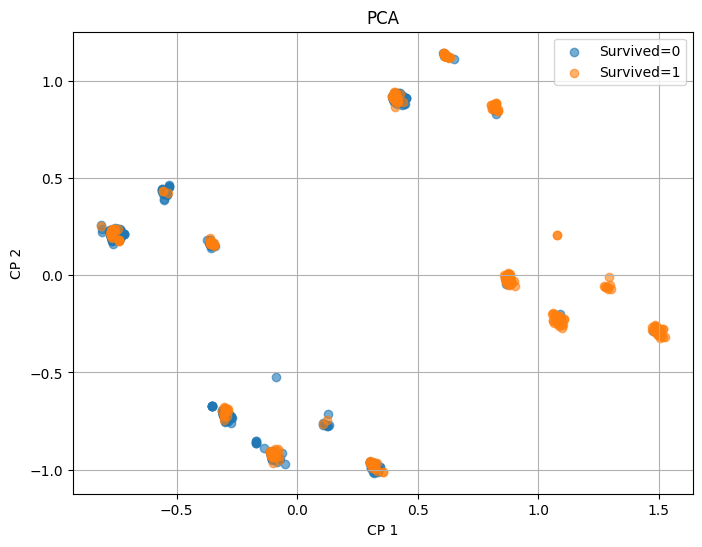

In [31]:
from sklearn.decomposition import PCA

X = train.drop(columns='Survived') # Solo predictores
y = train['Survived']

pca = PCA()
X_pca = pca.fit_transform(train)

# Reducción a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Survived'] = train['Survived'].values

# Visualización
plt.figure(figsize=(8, 6))
for label in [0, 1]:
    plt.scatter(df_pca[df_pca['Survived'] == label]['PC1'],
                df_pca[df_pca['Survived'] == label]['PC2'],
                label=f'Survived={label}', alpha=0.6)

plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.legend()
plt.title('PCA')
plt.grid(True)
plt.show()

🔴 Aquí parece apreciarse una clusterización acusada entre supervivientes y no supervivientes, pero no estoy seguro de la representación, ya que los subclústeres parecen igual de distribuídos y con el mismo patrón, y podría representar la modificación de los datos en el escalado, que el dataset es artificial, o un error de representación de la PCA.

# 🟥🟦 Construcción del modelo

*   ⚡ Logistic Regression
*   ⚡ Decision Tree
*   ⚡ K Nearest Neighbor
*   ⚡ Random Forest
*   ⚡ Support Vector Classifier

# ⚡⚡ Random Seed:
Para asegurar homogeneidad en los resultados de las pruebas de rendimiento, y para evitar resultados muy dispares cada vez que reiniciemos la instancia de Colab, vamos a fijar la semilla de aleatoriedad perviamente al desarrollo de todos los modelos:

In [32]:
import random
import numpy as np

SEED = 69
random.seed(SEED)
np.random.seed(SEED)

# ⚡ LOGISTIC REGRESSION ⚡
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Variables predictoras:
X = train[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Variable objetivo
y = train['Survived'].astype(int)

# Activar o no una prueba de rendimiento dentro de la regresión logística en train
prueba_rendimiento = True
if prueba_rendimiento:
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=SEED) # Prueba de rendimiento
else:
  X_train = X
  y_train = y

# REGRESIÓN LOGÍSTICA
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train) # Entrenamos el modelo

# Rendimiento obtenido
if prueba_rendimiento:
  score = model_lg.score(X_val, y_val)
  print(f'Accuracy en validación: {score:.4f}')
else:
  print('Sin prueba de rendimiento')

# Aplicamos el modelo sobre el dataframe test:
X_test = test[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]
# Predicciones en test
#y_test_pred = model.predict(X_test)

Accuracy en validación: 0.8427


Las pruenas de rendimiento del modelo de regresión logística se sitúan aproximadamente en un 80% de precisión.

Aplicamos el modelo a "test" y contrastamos con "train":

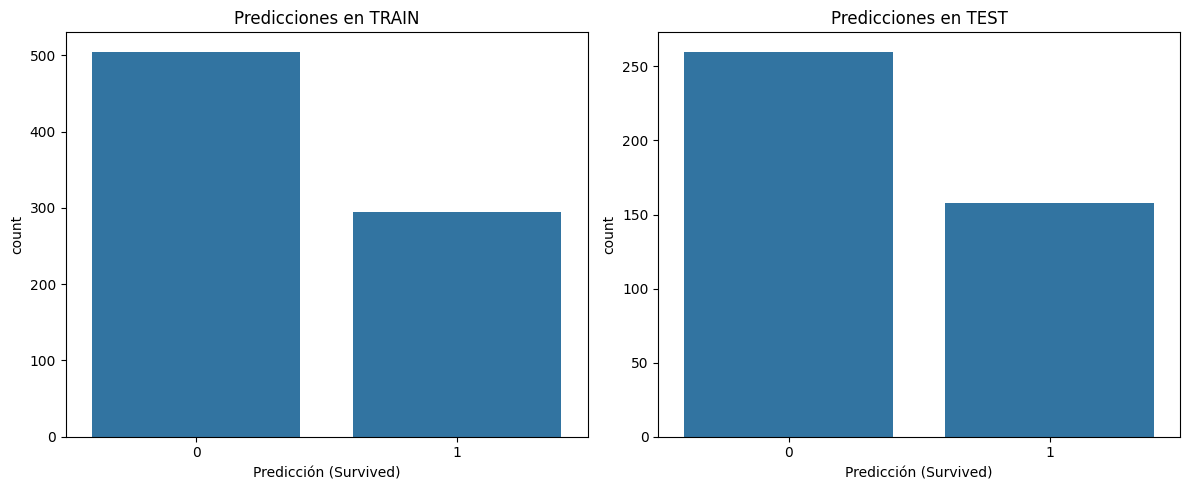

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicamos el modelo sobre el dataframe test: (ya aplicado en la celda anterior)
#X_test = test[['Age', 'SibSp', 'Parch', 'Fare']]
# Predicciones en test
y_test_pred = model_lg.predict(X_test)

# Predicciones en train
y_train_pred = model_lg.predict(X_train) # Predecimos sobre el dataframe sobre el que el modelo se ha entrenado


# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train_pred, ax=axes[0])
axes[0].set_title("Predicciones en TRAIN")
axes[0].set_xlabel("Predicción (Survived)")

sns.countplot(x=y_test_pred, ax=axes[1])
axes[1].set_title("Predicciones en TEST")
axes[1].set_xlabel("Predicción (Survived)")

plt.tight_layout()
plt.show()

🔴 El modelo parece predecir bien el ratio de supervivencia en "TEST", en contraste con "TRAIN".

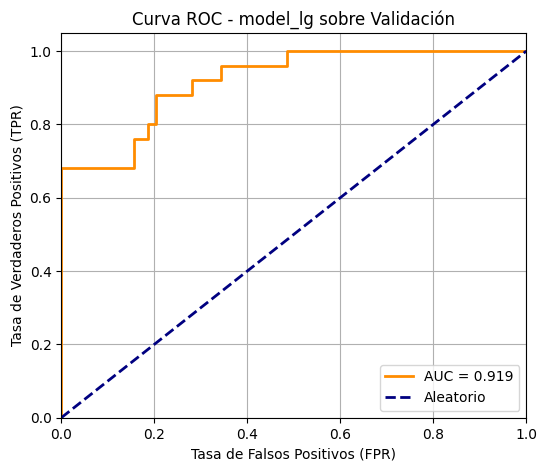

In [35]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Recalcula las probabilidades para X_val
y_val_proba_lg = model_lg.predict_proba(X_val)[:, 1]

# ROC y AUC sobre VALIDACIÓN
fpr, tpr, _ = roc_curve(y_val, y_val_proba_lg)
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - model_lg sobre Validación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

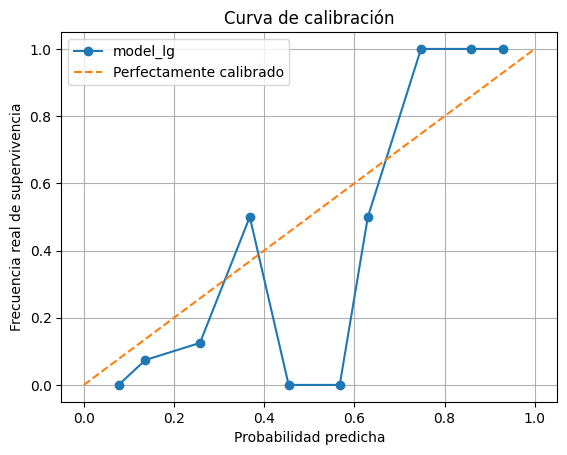

In [36]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

y_test_proba_lg = model_lg.predict_proba(X_val)[:, 1]
# y_val: reales
# y_test_proba_lg: calibradas
prob_true, prob_pred = calibration_curve(y_val, y_test_proba_lg, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='model_lg')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real de supervivencia')
plt.title('Curva de calibración')
plt.legend()
plt.grid()
plt.show()

🔴 La precisión del modelo es aceptable, pero todavía dista de ser buena o excelente.

🔴 Predice muy mal los casos entorno al 0.5, el modelo no es capaz de elegir bien en la zona de mayor incertidumbre.

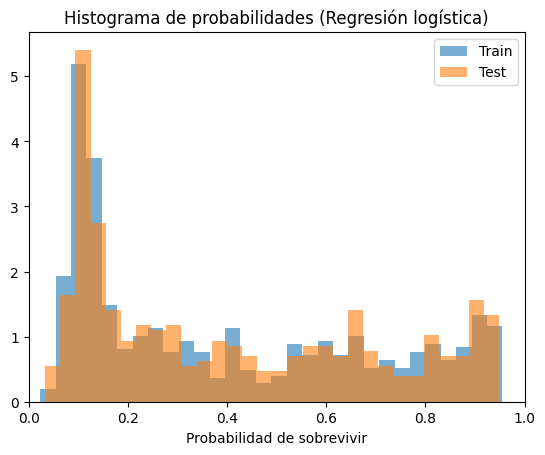

In [37]:
y_train_proba_lg = model_lg.predict_proba(X_train)[:, 1]
y_test_proba_lg = model_lg.predict_proba(X_test)[:, 1]

#sns.histplot(y_train_proba, label='Train', kde=False, bins=30, color='blue', stat='density')
#sns.histplot(y_test_proba, label='Test', kde=False, bins=30, color='orange', stat='density')
plt.hist(y_train_proba_lg, bins=30, alpha=0.6, label='Train', density=True)
plt.hist(y_test_proba_lg, bins=30, alpha=0.6, label='Test', density=True)
plt.xlabel("Probabilidad de sobrevivir")
plt.title("Histograma de probabilidades (Regresión logística)")
plt.legend()
plt.xlim(0, 1)
plt.show()

🔴 Ésta es la visualización más precisa (el histograma), pero graficaremos curvas para entender mejor la distribución:

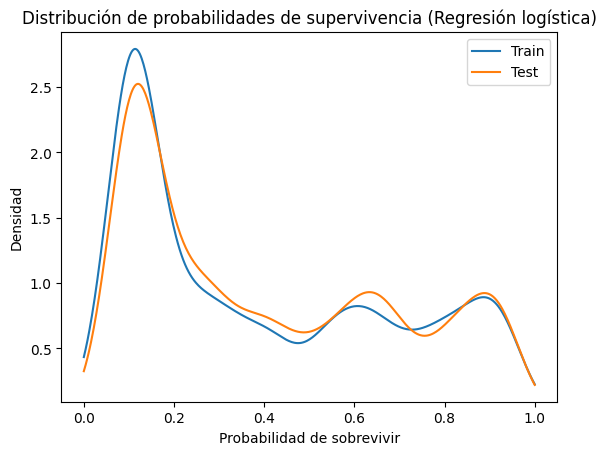

In [38]:
from statsmodels.nonparametric.kde import KDEUnivariate

# KDE controlada para Train
kde_train = KDEUnivariate(y_train_proba_lg)
kde_train.fit(bw=0.05, fft=False)  # Ajustar curva a los datos o suavizarla

# KDE controlada para Test
kde_test = KDEUnivariate(y_test_proba_lg)
kde_test.fit(bw=0.05, fft=False)

# Plot
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, kde_train.evaluate(x_grid), label="Train")
plt.plot(x_grid, kde_test.evaluate(x_grid), label="Test")
plt.title("Distribución de probabilidades de supervivencia (Regresión logística)")
plt.xlabel("Probabilidad de sobrevivir")
plt.ylabel("Densidad")
plt.legend()
plt.show()

🔴 Éstos picos en 0.1-0.2 y 0.6-0.9 significan que el modelo reconoce dos picos y un valle entre ambas. Los picos indican la predicción que ha hecho el modelo con las probabilidades de supervivencia (uno más cercano a 0 y los otros 2 más cercanos a 1), y el valle, la incertidumbre que el modelo tiene acerca de la supervivencia en determinados casos.

Todo ésto parece indicar que algunas variables sí son condicionantes para las probabilidades de supervivencia, y el modelo se ha entrenado correctamente.

🟣 Un caso en el que el modelo tendría un alto grado de incertidumbre es en aquel en el que hay un único pico cercano al 0.5, indicando que el modelo no sabe donde situar la mayoría de los casos.

🔴 Concluimos por tanto que al ser el accuracy de un 80%, y que el error se debe a los puntos en el que el modelo tiene incertidumbre (el valle entre ambos picos), que el modelo predice bien estadísticamente la supervivencia, pero no es excelente, pues no es capaz de determinar la supervivencia de un individuo con la suficiente confianza (y además el valle no es lo suficientemente acusado, el propio modelo no tiene la suficiente confianza en algunos casos).

Además, es reseñable ver cómo Train es más preciso con las probabilidades en el pico de no sobrevivir, mientras que en Test, hay mayor cantidad de puntos cerca de 0.5 (mayor incertidumbre), pero a su vez, tiene mayor seguridad con las probabilidades moderadas de supervivencia (el primer pico "positivo" entre 0.6 y 0.7).

# ⚡ DECISION TREE ⚡
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Vuelvoa seleccionar las variables predictoras y objetivo
# Variables predictoras:
X = train[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Objetivo
y = train['Survived'].astype(int)

# Prueba de rendimiento
prueba_rendimiento = True
if prueba_rendimiento:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=SEED)
else:
    X_train = X
    y_train = y

# ÁRBOL DE DECISIÓN:
model_dt = DecisionTreeClassifier(random_state=SEED, max_depth=3)
model_dt.fit(X_train, y_train)

# Rendimiento obtenido
if prueba_rendimiento:
    score = model_dt.score(X_val, y_val)
    print(f'Accuracy en validación: {score:.4f}')
else:
    print('Sin prueba de rendimiento')

# Aplicamos el modelo sobre el dataframe test:
X_test = test[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Accuracy en validación: 0.8652


La precición del modelo ronda entre el 74% y el 87%, lo que lo hace aproximadamente igual de preciso que la regresión logística.

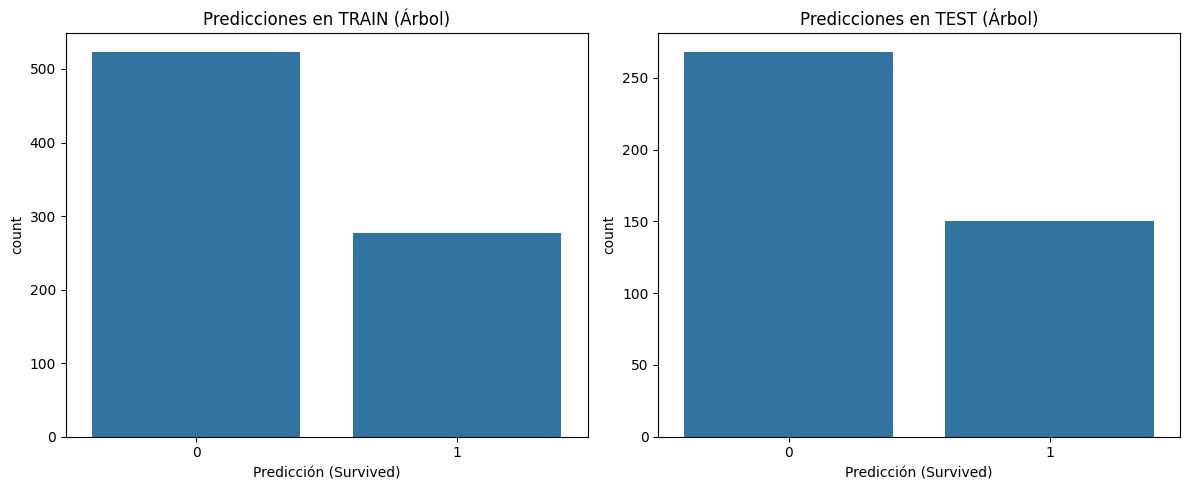

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicamos el modelo sobre el dataframe test: (ya aplicado en la celda anterior)
#X_test = test[['Age', 'SibSp', 'Parch', 'Fare']]
# Predicciones en test
y_test_pred = model_dt.predict(X_test)
# Predicciones en train
y_train_pred = model_dt.predict(X_train)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train_pred, ax=axes[0])
axes[0].set_title("Predicciones en TRAIN (Árbol)")
axes[0].set_xlabel("Predicción (Survived)")

sns.countplot(x=y_test_pred, ax=axes[1])
axes[1].set_title("Predicciones en TEST (Árbol)")
axes[1].set_xlabel("Predicción (Survived)")

plt.tight_layout()
plt.show()

Podemos observar cómo la precición es buena, muy similar a la de la regresión logística.

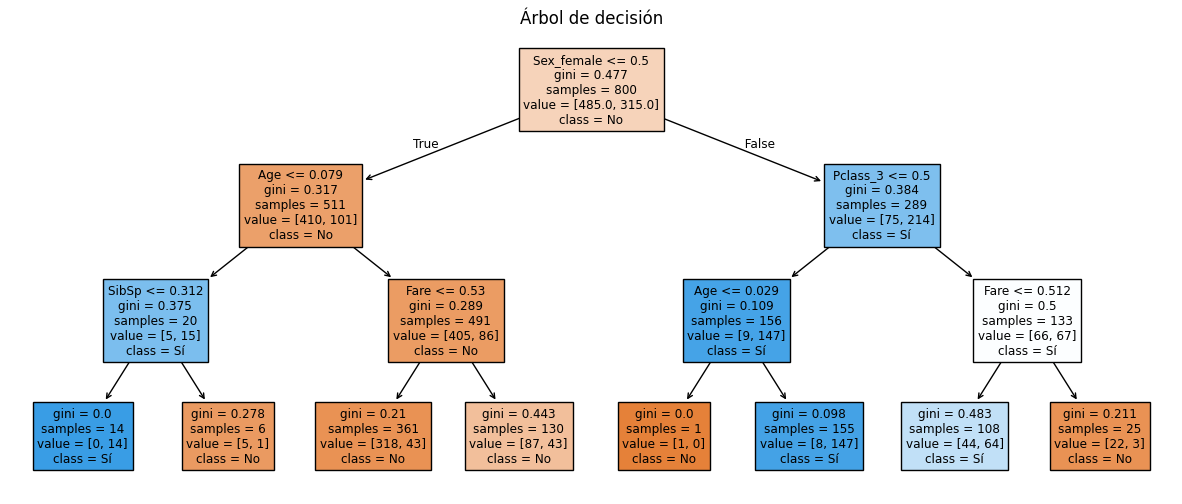

In [41]:
from sklearn.tree import plot_tree

# Visualizar el Árbol de Decisión

plt.figure(figsize=(15, 6))
plot_tree(model_dt, feature_names=X.columns, class_names=["No", "Sí"], filled=True)
plt.title("Árbol de decisión")
plt.show()

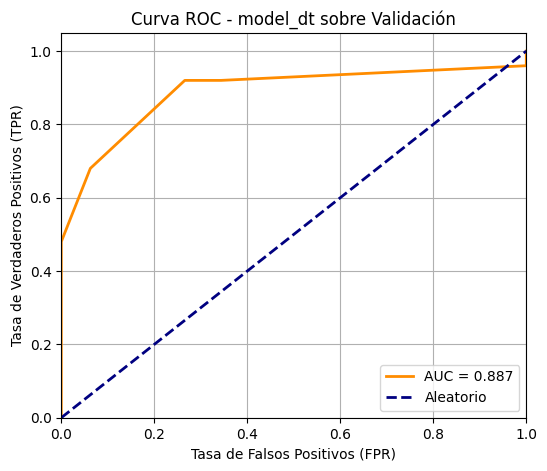

In [42]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Recalcula las probabilidades para X_val
y_val_proba_dt = model_dt.predict_proba(X_val)[:, 1]

# ROC y AUC sobre VALIDACIÓN
fpr, tpr, _ = roc_curve(y_val, y_val_proba_dt)
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - model_dt sobre Validación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

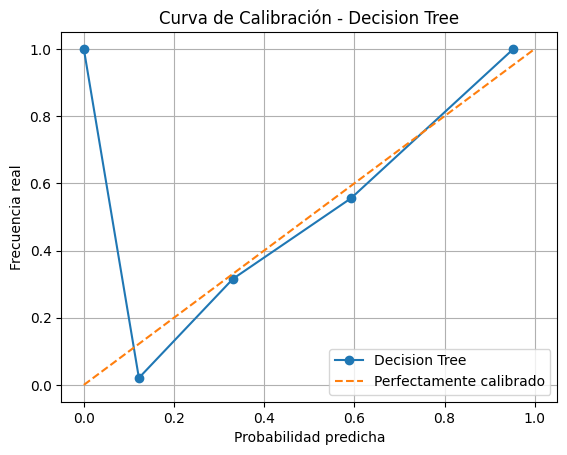

In [43]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Probabilidades de supervivencia predichas por la regresión logística
y_val_proba_dt = model_dt.predict_proba(X_val)[:, 1]

# Curva de calibración
prob_true, prob_pred = calibration_curve(y_val, y_val_proba_dt, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real')
plt.title('Curva de Calibración - Decision Tree')
plt.legend()
plt.grid()
plt.show()

🔴 Decision Tree parece ajustarse bastante bien, sólo tiene un problema, que puede verse en la curva de calibración, entre los puntos 0.0 y 0.1, que baja bastante su AUC.

🔴 Lo que se puede ver en la curva de calibración es que el modelo se equivoca mucho en las predicciones que hace sobre los individuos que piensa que tienen las menores probabilidades de sobrevivir, y sin embargo, muchos de éstos si han terminado sobreviviendo.

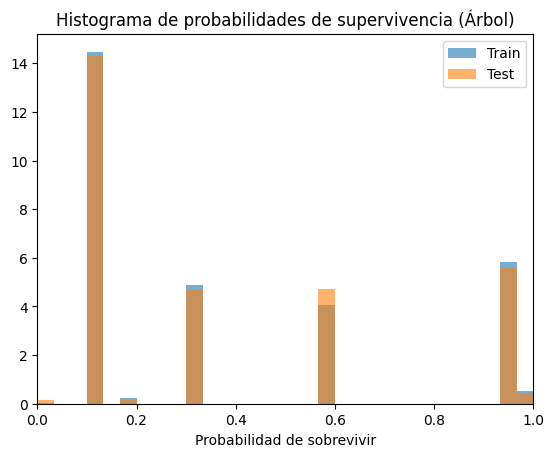

In [44]:
y_train_proba_dt = model_dt.predict_proba(X_train)[:, 1]
y_test_proba_dt = model_dt.predict_proba(X_test)[:, 1]

plt.hist(y_train_proba_dt, bins=30, alpha=0.6, label='Train', density=True)
plt.hist(y_test_proba_dt, bins=30, alpha=0.6, label='Test', density=True)
plt.xlabel("Probabilidad de sobrevivir")
plt.title("Histograma de probabilidades de supervivencia (Árbol)")
plt.legend()
plt.xlim(0, 1)
plt.show()

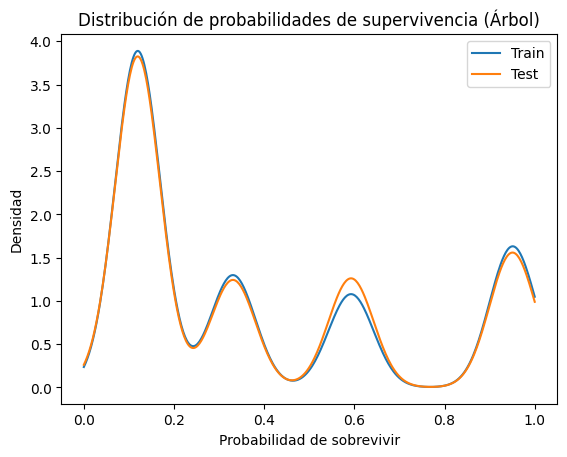

In [45]:
from statsmodels.nonparametric.kde import KDEUnivariate

# KDE controlada para Train
kde_train_dt = KDEUnivariate(y_train_proba_dt)
kde_train_dt.fit(bw=0.05, fft=False)  # Ajustar curva a los datos o suavizarla

# KDE controlada para Test
kde_test_dt = KDEUnivariate(y_test_proba_dt)
kde_test_dt.fit(bw=0.05, fft=False)

# Plot
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, kde_train_dt.evaluate(x_grid), label="Train")
plt.plot(x_grid, kde_test_dt.evaluate(x_grid), label="Test")
plt.title("Distribución de probabilidades de supervivencia (Árbol)")
plt.xlabel("Probabilidad de sobrevivir")
plt.ylabel("Densidad")
plt.legend()
plt.show()

🔴 Podemos ver, sin embargo, que aunque el modelo se equivoca aproximadamente en un 20% de los casos (igual que la regresión logística), el modelo tiene más seguridad de dónde emplazar las predicciones, y al separar los diferentes picos, vemos cómo la incertidumbre es bastante baja.

🔴 Es muy interesante cómo el grupo que mejor aísla es el de la derecha del todo, probablemente por elegir sexo femenino, primera clase y edad inferior a 29 años, como puede verse en el árbol de decisión.

También es interesante ver cómo, a pesar de que es un modelo que tiene mayor seguridad de las predicciones que saca, realmente se equivoca en el mismo porcentaje de decisiones.

🔴 Como vimos en la curva de calibración, la calibración del modelo se ajusta muy bien con la diagonal, lo que lo hace excelente para predecir las probabilidades de supervivencia siempre y cuando no sean las más bajas.

# ⚡ K NEAREST NEIGHBOR ⚡
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV

# Vuelvo a seleccionar las variables predictoras y objetivo
# Variables predictoras:
X = train[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Objetivo
y = train['Survived'].astype(int)

# Prueba de rendimiento
prueba_rendimiento = True
if prueba_rendimiento:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.9, random_state=SEED)
else:
    X_train = X
    y_train = y

# K NEAREST NEIGHBOR
model_knn = KNeighborsClassifier(n_neighbors=4) # Ya que en los demás modelos han surgido 4 picos, vamos a buscarlos aquí también
knn = CalibratedClassifierCV(model_knn, method='isotonic', cv=4)
knn.fit(X_train, y_train)

# Rendimiento obtenido
if prueba_rendimiento:
    score = knn.score(X_val, y_val)
    print(f'Accuracy en validación: {score:.4f}')
else:
    print('Sin prueba de rendimiento')

# Aplicamos el modelo sobre el dataframe test:
X_test = test[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Accuracy en validación: 0.7129


🔴 He usado CalibratedClassifierCV por que sin clasificar, parecía no representar correctamente las probabilidades dentro de la distribución, es decir, creo que no estaba generando una separación entre las clases.

La precición del modelo ronda entre el 75% y el 87%, lo que lo hace aproximadamente igual de preciso que la regresión logística.

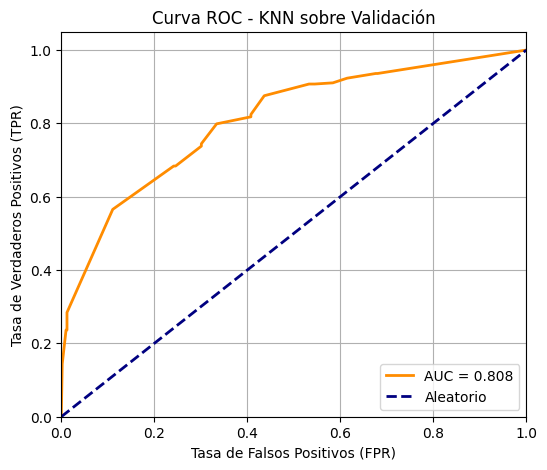

In [47]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Recalcula las probabilidades para X_val
y_val_proba_knn = knn.predict_proba(X_val)[:, 1]

# ROC y AUC sobre VALIDACIÓN
fpr, tpr, _ = roc_curve(y_val, y_val_proba_knn)
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - KNN sobre Validación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

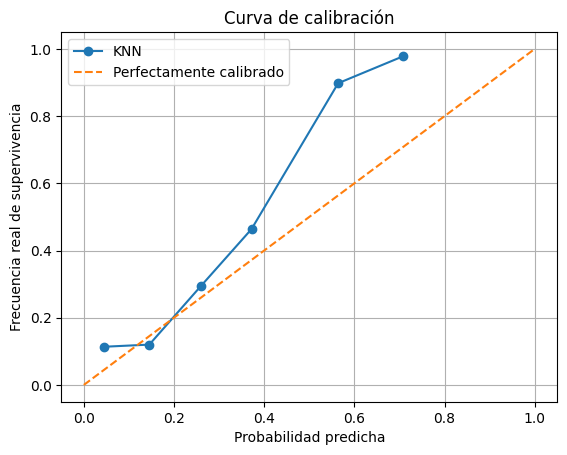

In [48]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

y_val_proba_knn_cal = knn.predict_proba(X_val)[:, 1]
# y_test: reales, y_test_proba_knn_cal: calibradas
prob_true, prob_pred = calibration_curve(y_val, y_val_proba_knn_cal, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o', label='KNN')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real de supervivencia')
plt.title('Curva de calibración')
plt.legend()
plt.grid()
plt.show()

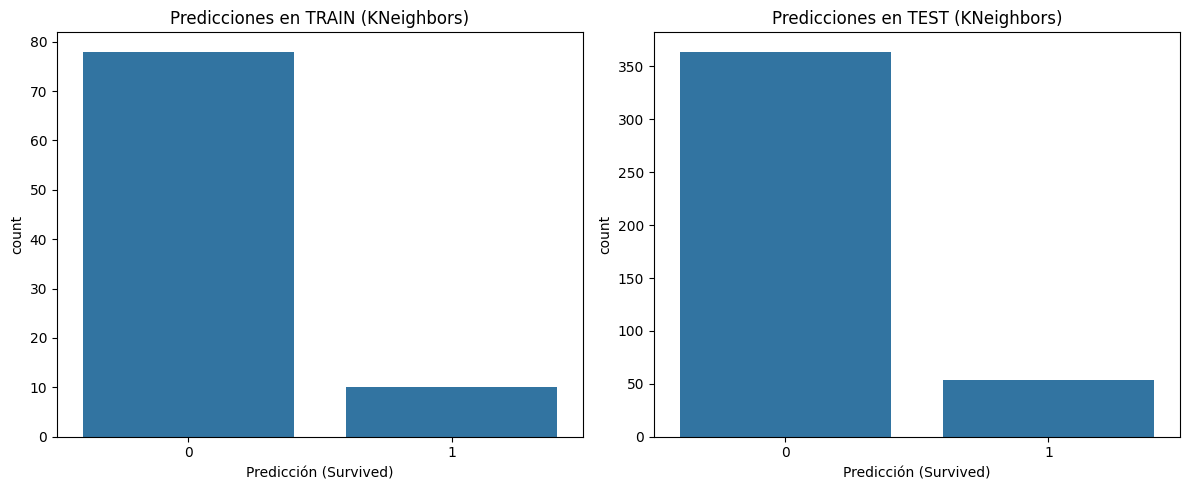

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicamos el modelo sobre el dataframe test: (ya aplicado en la celda anterior)
# Predicciones en test
y_test_pred = knn.predict(X_test)
# Predicciones en train
y_train_pred = knn.predict(X_train)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train_pred, ax=axes[0])
axes[0].set_title("Predicciones en TRAIN (KNeighbors)")
axes[0].set_xlabel("Predicción (Survived)")

sns.countplot(x=y_test_pred, ax=axes[1])
axes[1].set_title("Predicciones en TEST (KNeighbors)")
axes[1].set_xlabel("Predicción (Survived)")

plt.tight_layout()
plt.show()

🔴 Modelo muy pesimista, es muy probable que ese ~20% de error ocurra sobretodo al predecir demasiados 0 y muy pocos 1, ya que en el análisis exploratorio ya vimos que el porcentaje de supervivencia rondaba el 38%.

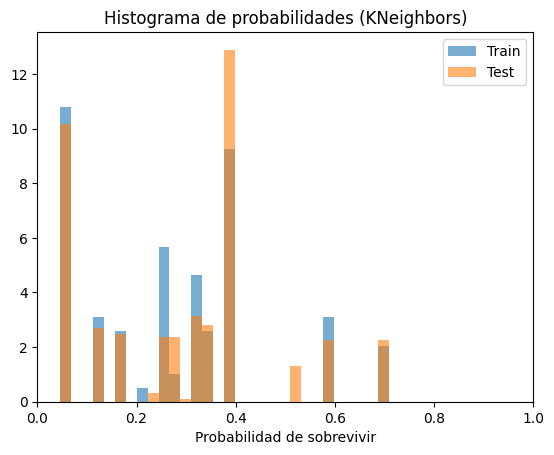

In [50]:
y_train_proba_knn = knn.predict_proba(X_train)[:, 1]
y_test_proba_knn = knn.predict_proba(X_test)[:, 1]

#sns.histplot(y_train_proba, label='Train', kde=False, bins=30, color='blue', stat='density')
#sns.histplot(y_test_proba, label='Test', kde=False, bins=30, color='orange', stat='density')
plt.hist(y_train_proba_knn, bins=30, alpha=0.6, label='Train', density=True)
plt.hist(y_test_proba_knn, bins=30, alpha=0.6, label='Test', density=True)
plt.xlabel("Probabilidad de sobrevivir")
plt.title("Histograma de probabilidades (KNeighbors)")
plt.legend()
plt.xlim(0, 1)
plt.show()

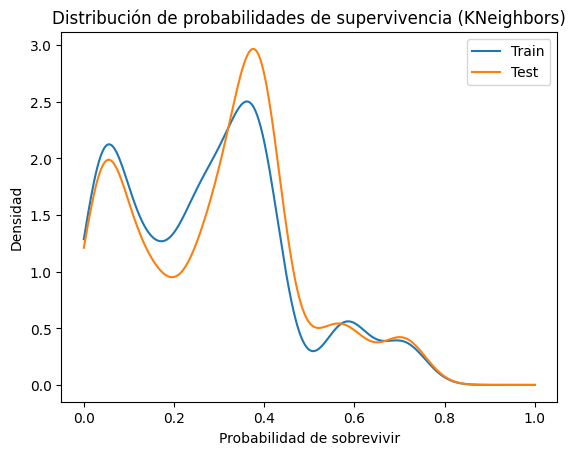

In [51]:
from statsmodels.nonparametric.kde import KDEUnivariate

# KDE controlada para Train
kde_train_knn = KDEUnivariate(y_train_proba_knn)
kde_train_knn.fit(bw=0.05, fft=False)  # Ajustar curva a los datos o suavizarla

# KDE controlada para Test
kde_test_knn = KDEUnivariate(y_test_proba_knn)
kde_test_knn.fit(bw=0.05, fft=False)

# Plot
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, kde_train_knn.evaluate(x_grid), label="Train")
plt.plot(x_grid, kde_test_knn.evaluate(x_grid), label="Test")
plt.title("Distribución de probabilidades de supervivencia (KNeighbors)")
plt.xlabel("Probabilidad de sobrevivir")
plt.ylabel("Densidad")
plt.legend()
plt.show()

🔴 Ahora, podemos ver con mayor detalle que el modelo es excesivamente pesimista

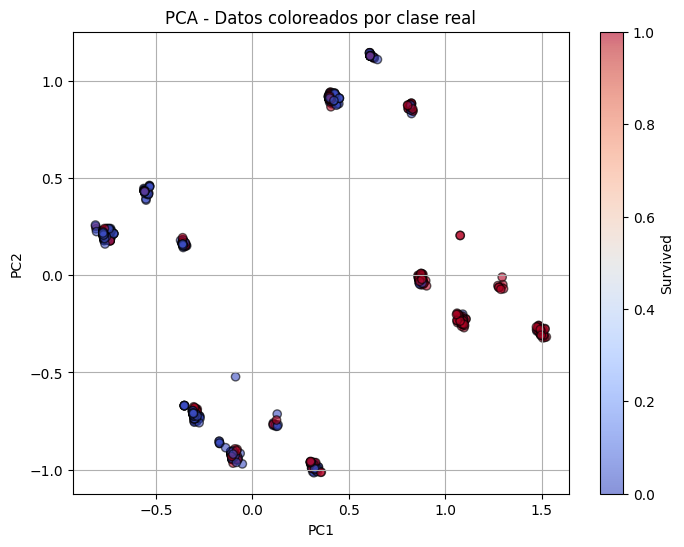

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Puedes colorear por clase real
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6, edgecolor='k')
plt.title('PCA - Datos coloreados por clase real')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Survived')
plt.grid(True)
plt.show()

y_proba_knn = knn.predict_proba(X)[:, 1]

🔴 Los 4 clústeres podrían representar los 4 picos que surgen en los otros modelos. Lo único que tengo seguro es que el clúster más a la derecha tiene un ratio muy alto de supervivencia, pero para los otros 3 no se puede saber.Sería conveniente hacer la media y colocarlos en una escala lineal de supervivencia.

# ⚡ RANDOM FOREST ⚡
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Vuelvoa seleccionar las variables predictoras y objetivo
# Variables predictoras:
X = train[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Objetivo
y = train['Survived'].astype(int)

# Prueba de rendimiento
prueba_rendimiento = True
if prueba_rendimiento:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.9, random_state=SEED)
else:
    X_train = X
    y_train = y

# RANDOM FOREST
model_rf = RandomForestClassifier(n_estimators=100, random_state=SEED)
model_rf.fit(X_train, y_train)

# Rendimiento obtenido
if prueba_rendimiento:
    score = model_rf.score(X_val, y_val)
    print(f'Accuracy en validación: {score:.4f}')
else:
    print('Sin prueba de rendimiento')

# Aplicamos el modelo sobre el dataframe test:
X_test = test[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Accuracy en validación: 0.7403


Precisión del modelo ronda aproximadamente entre el 74% y el 84%, lo que lo hace moderadamente bueno prediciendo.

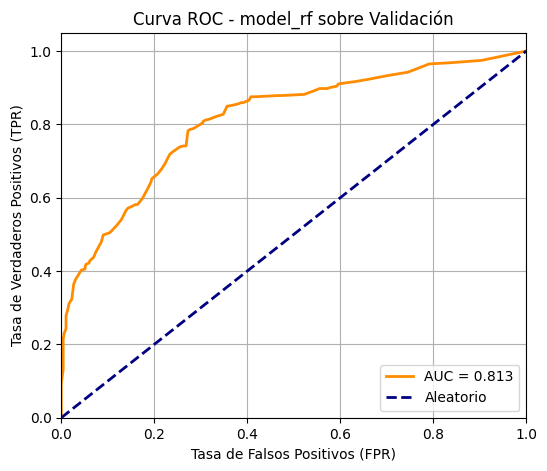

In [54]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Recalcula las probabilidades para X_val
y_val_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# ROC y AUC sobre VALIDACIÓN
fpr, tpr, _ = roc_curve(y_val, y_val_proba_rf)
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - model_rf sobre Validación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

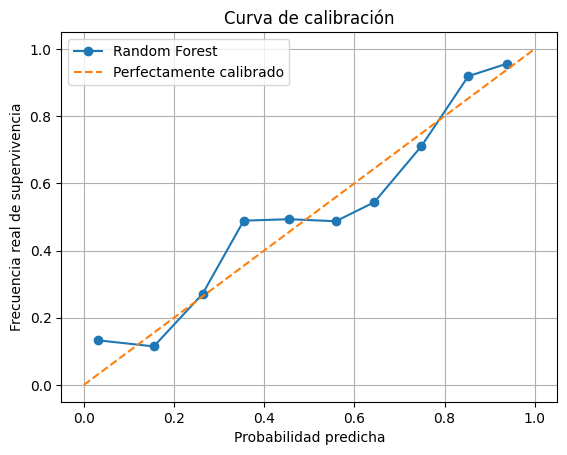

In [55]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.calibration import calibration_curve
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configurar opciones en esta celda en lugar de en la celda del modelo
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Probabilidades predichas por el modelo Random Forest para la clase positiva
y_test_proba_rf = model_rf.predict_proba(X_val)[:, 1]

# Curva de calibración
prob_true, prob_pred = calibration_curve(y_val, y_test_proba_rf, n_bins=10)

# Graficar
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real de supervivencia')
plt.title('Curva de calibración')
plt.legend()
plt.grid()
plt.show()

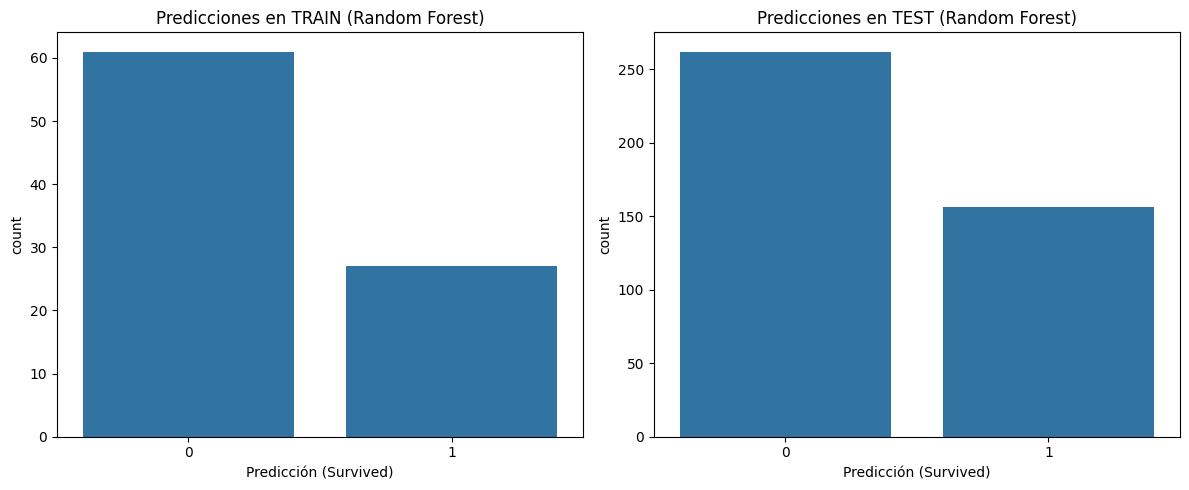

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicamos el modelo sobre el dataframe test: (ya aplicado en la celda anterior)
#X_test = test[['Age', 'SibSp', 'Parch', 'Fare']]
# Predicciones en test
y_test_pred = model_rf.predict(X_test)
# Predicciones en train
y_train_pred = model_rf.predict(X_train)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train_pred, ax=axes[0])
axes[0].set_title("Predicciones en TRAIN (Random Forest)")
axes[0].set_xlabel("Predicción (Survived)")

sns.countplot(x=y_test_pred, ax=axes[1])
axes[1].set_title("Predicciones en TEST (Random Forest)")
axes[1].set_xlabel("Predicción (Survived)")

plt.tight_layout()
plt.show()

🔴 Modelo más optimista en test que en train

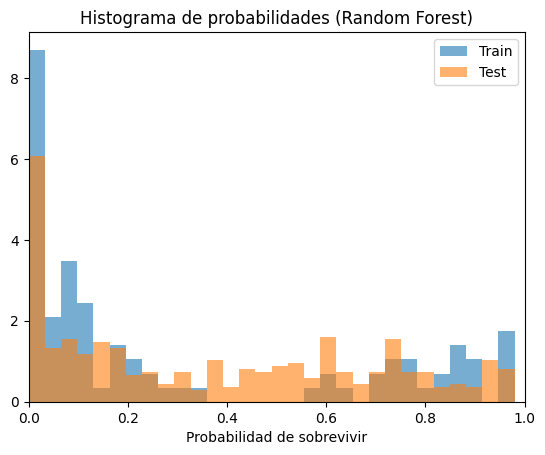

In [57]:
y_train_proba_rf = model_rf.predict_proba(X_train)[:, 1]
y_test_proba_rf = model_rf.predict_proba(X_test)[:, 1]

#sns.histplot(y_train_proba, label='Train', kde=False, bins=30, color='blue', stat='density')
#sns.histplot(y_test_proba, label='Test', kde=False, bins=30, color='orange', stat='density')
plt.hist(y_train_proba_rf, bins=30, alpha=0.6, label='Train', density=True)
plt.hist(y_test_proba_rf, bins=30, alpha=0.6, label='Test', density=True)
plt.xlabel("Probabilidad de sobrevivir")
plt.title("Histograma de probabilidades (Random Forest)")
plt.legend()
plt.xlim(0, 1)
plt.show()

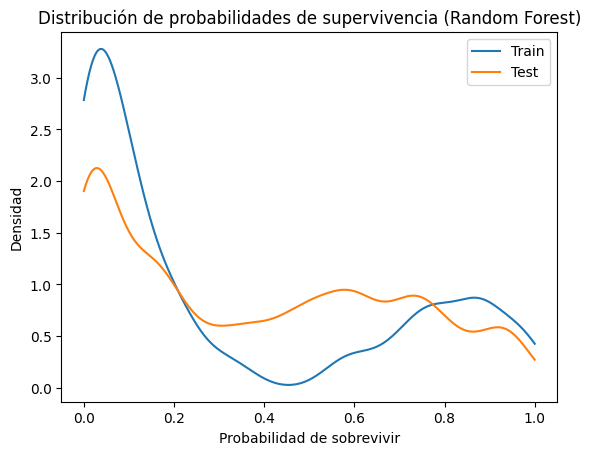

In [58]:
from statsmodels.nonparametric.kde import KDEUnivariate

# KDE controlada para Train
kde_train_rf = KDEUnivariate(y_train_proba_rf)
kde_train_rf.fit(bw=0.05, fft=False)  # Ajustar curva a los datos o suavizarla

# KDE controlada para Test
kde_test_rf = KDEUnivariate(y_test_proba_rf)
kde_test_rf.fit(bw=0.05, fft=False)

# Plot
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, kde_train_rf.evaluate(x_grid), label="Train")
plt.plot(x_grid, kde_test_rf.evaluate(x_grid), label="Test")
plt.title("Distribución de probabilidades de supervivencia (Random Forest)")
plt.xlabel("Probabilidad de sobrevivir")
plt.ylabel("Densidad")
plt.legend()
plt.show()

🔴 El modelo tiene bastante seguridad en sus predicciones, aunque es de los más distantes a la línea de test, ya que parece tener bastante menos confianza con el conjunto test.

🔴 Es un modelo demasiado bien optimizado para train que, por alguna razón, no rinde igual de bien con el conjunto test. Tal vez se pueda configurar mejor para lograr un punto medio en el que ambas predicciones sean semejantes (ajuste del modelo).
Es posible que el modelo haya memorizado demasiado los datos de train, al ser éste un conjunto de datos pequeño. Es posible que modificando algún parámetro del modelo como el número de árboles (n_estimators) o max_depth, ajuste mejor el modelo a test.

    # Podemos ajustar mejor el modelo modificando alguno de los siguientes valores:
    model_rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_split=10,
        random_state=SEED
    )

# ⚡ SUPPORT VECTOR CLASSIFIER ⚡
⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡⚡

In [59]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Vuelvoa seleccionar las variables predictoras y objetivo
# Variables predictoras:
X = train[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Objetivo
y = train['Survived'].astype(int)

# Prueba de rendimiento (para pruebas finales se usa test en lugar de val)
prueba_rendimiento = True
if prueba_rendimiento:
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=SEED)
else:
    X_train = X
    y_train = y

# SUPPORT VECTOR CLASSIFIER
model_svc = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=SEED)
model_svc.fit(X_train, y_train)

# Rendimiento obtenido
if prueba_rendimiento:
    score = model_rf.score(X_val, y_val)
    print(f'Accuracy en validación: {score:.4f}')
else:
    print('Sin prueba de rendimiento')

# Aplicamos el modelo sobre el dataframe test:
X_test = test[['Age', 'SibSp', 'Parch', 'Fare',
           'Pclass_1', 'Pclass_2', 'Pclass_3',
           'Sex_female', 'Sex_male',
           'Embarked_C', 'Embarked_Q', 'Embarked_S']]

Accuracy en validación: 0.8202


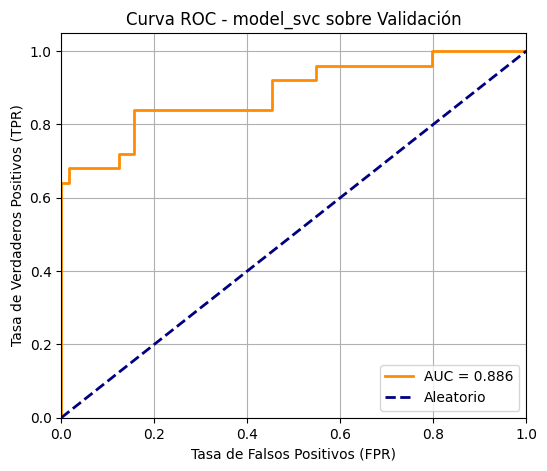

In [60]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Recalcula las probabilidades para X_val
y_val_proba_svc = model_svc.predict_proba(X_val)[:, 1]

# ROC y AUC sobre VALIDACIÓN
fpr, tpr, _ = roc_curve(y_val, y_val_proba_svc)
roc_auc = auc(fpr, tpr)

# Curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - model_svc sobre Validación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

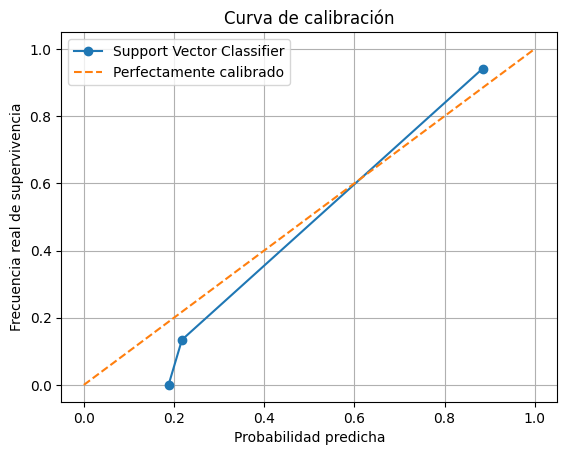

In [61]:
# El resultado depende de cómo configuremos train_test_split en la prueba de rendimiento

from sklearn.calibration import calibration_curve
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Configurar opciones en esta celda en lugar de en la celda del modelo
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=69)

# Probabilidades predichas por el modelo Random Forest para la clase positiva
y_test_proba_svc = model_svc.predict_proba(X_val)[:, 1]

# Curva de calibración
prob_true, prob_pred = calibration_curve(y_val, y_test_proba_svc, n_bins=10)

# Graficar
plt.plot(prob_pred, prob_true, marker='o', label='Support Vector Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectamente calibrado')
plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia real de supervivencia')
plt.title('Curva de calibración')
plt.legend()
plt.grid()
plt.show()

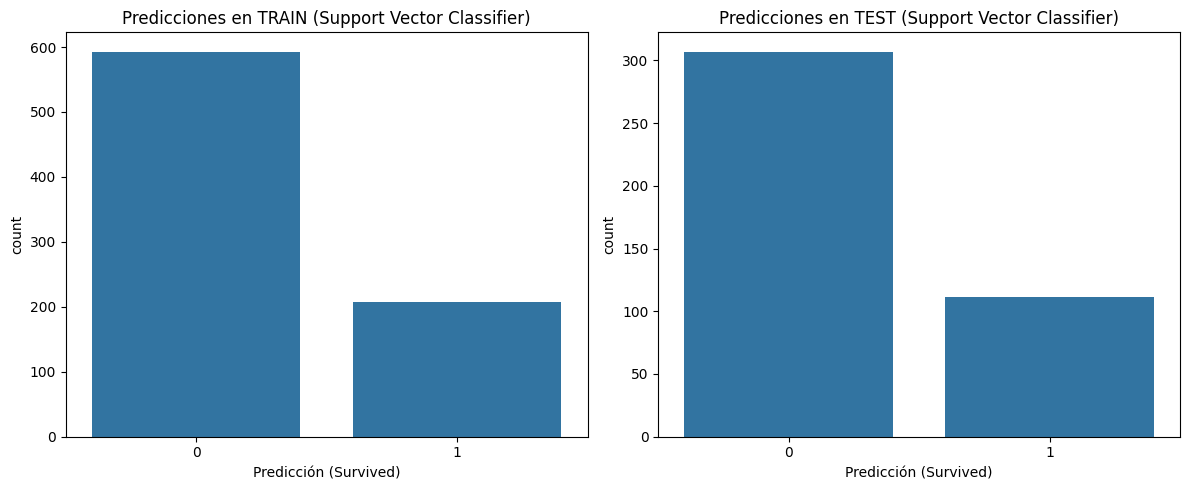

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicamos el modelo sobre el dataframe test: (ya aplicado en la celda anterior)
#X_test = test[['Age', 'SibSp', 'Parch', 'Fare']]
# Predicciones en test
y_test_pred = model_svc.predict(X_test)
# Predicciones en train
y_train_pred = model_svc.predict(X_train)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=y_train_pred, ax=axes[0])
axes[0].set_title("Predicciones en TRAIN (Support Vector Classifier)")
axes[0].set_xlabel("Predicción (Survived)")

sns.countplot(x=y_test_pred, ax=axes[1])
axes[1].set_title("Predicciones en TEST (Support Vector Classifier)")
axes[1].set_xlabel("Predicción (Survived)")

plt.tight_layout()
plt.show()

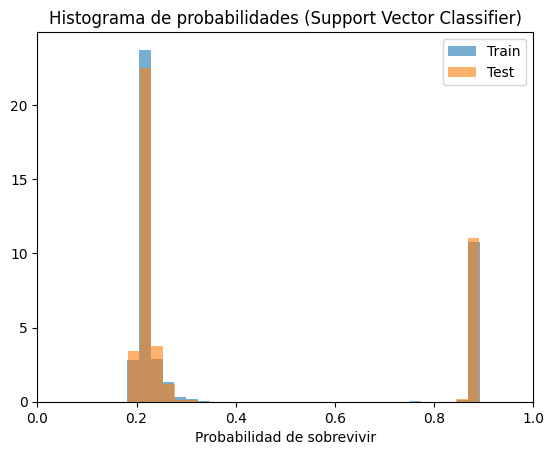

In [63]:
y_train_proba_svc = model_svc.predict_proba(X_train)[:, 1]
y_test_proba_svc = model_svc.predict_proba(X_test)[:, 1]

#sns.histplot(y_train_proba, label='Train', kde=False, bins=30, color='blue', stat='density')
#sns.histplot(y_test_proba, label='Test', kde=False, bins=30, color='orange', stat='density')
plt.hist(y_train_proba_svc, bins=30, alpha=0.6, label='Train', density=True)
plt.hist(y_test_proba_svc, bins=30, alpha=0.6, label='Test', density=True)
plt.xlabel("Probabilidad de sobrevivir")
plt.title("Histograma de probabilidades (Support Vector Classifier)")
plt.legend()
plt.xlim(0, 1)
plt.show()

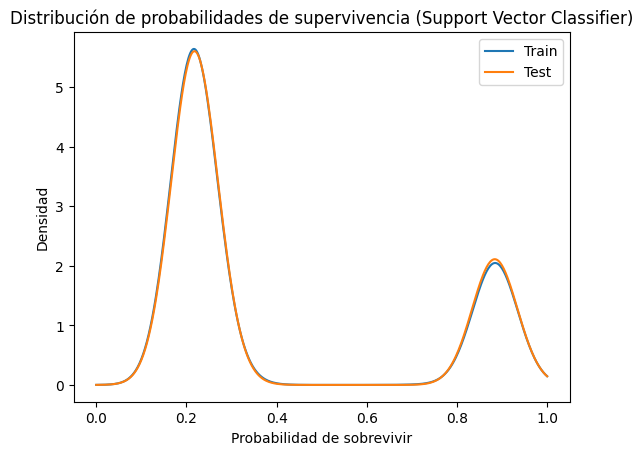

In [64]:
from statsmodels.nonparametric.kde import KDEUnivariate

# KDE controlada para Train
kde_train_svc = KDEUnivariate(y_train_proba_svc)
kde_train_svc.fit(bw=0.05, fft=False)  # Ajustar curva a los datos o suavizarla

# KDE controlada para Test
kde_test_svc = KDEUnivariate(y_test_proba_svc)
kde_test_svc.fit(bw=0.05, fft=False)

# Plot
x_grid = np.linspace(0, 1, 500)
plt.plot(x_grid, kde_train_svc.evaluate(x_grid), label="Train")
plt.plot(x_grid, kde_test_svc.evaluate(x_grid), label="Test")
plt.title("Distribución de probabilidades de supervivencia (Support Vector Classifier)")
plt.xlabel("Probabilidad de sobrevivir")
plt.ylabel("Densidad")
plt.legend()
plt.show()

🔴 El modelo no tiene del todo claro quien no sobrevive (como puede verse en la curva de calibración), porque si no el pico correspondiente se encontrarían más cerca de 0, pero sí tiene más claro quien probablemente sí sobreviva. Pero, por otro lado, se puede ver que el modelo funciona bastante bien ajustado a ambos conjuntos, generando una distribución de probabilidades casi idéntica.

🔴 El modelo predice con bastante certidumbre, pero sólo acierta ligeramente más que los otros modelos probados.

# 🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦🟥🟦

# **CONCLUSIONES GENERALES**

Breve comparación de rendimiento de todos los modelos:

In [65]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

modelos = {
    'Logistic Regression': model_lg,
    'Decision Tree':model_dt,
    'KNN': knn,
    'Random Forest': model_rf,
    'Support Vector Classifier': model_svc
    }

# Diccionario resultados tests
resultados = []

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_val)
    y_proba = modelo.predict_proba(X_val)[:, 1] if hasattr(modelo, "predict_proba") else None

    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'AUC': roc_auc_score(y_val, y_proba) if y_proba is not None else 'N/A'
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='Accuracy', ascending=False)
print(df_resultados)

                      Modelo  Accuracy  F1 Score       AUC
4  Support Vector Classifier  0.887640  0.761905  0.885625
1              Decision Tree  0.865169  0.739130  0.887500
0        Logistic Regression  0.842697  0.708333  0.919375
3              Random Forest  0.820225  0.680000  0.883125
2                        KNN  0.808989  0.484848  0.867813


🔴 Ningún modelo ha tenido un rendimiento excelente, y aunque alguna métrica puntual en la descripción de los resultados del modelo, o aquí en la evaluacion final comparada, puede dar algún valor que pase del 90%, si lo comparamos con otras métricas de precisión y con las gráficas descriptivas, se puede ver que ningún modelo ofrece pruebas de un rendimiento más allá del del categorizable como aceptable o bueno, pero para nada excelente.


🔴 El modelo más preciso y con más consistencia en los diferentes tests ha sido "Support Vector Classifier", y el peor "K Nearest Neighbors", un algoritmo que a primera vista no parece la mejor opción para un caso como éste, ya que en la PCA podíamos observar como los clústeres no tienen la suficiente diferencia entre supervivencia o deceso (el clúster más a la derecha sí tiene más ratio de supervivencia, tal vez si otro clúster como el del extremo izquierda tuviera mayor ratio de decesos, habría resultado un modelo más competitivo o superior al resto de los aplicados).


🔴 Tal vez otros modelos de ML sean algo más precisos, como Catboost (que también es de aprendizaje supervisado), según he leído en ésta página: https://www.kaggle.com/code/manrunning/catboost-for-titanic-top-7 y en ésta también: https://medium.com/backprop-labs/kaggle-submission-for-titanic-dataset-fd7950a0d65, pero según se puede ver, la mejora de rendimiento tampoco lo coloca como excelente, sigue con una precisión buena o moderadamente muy buena.